In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\\Users\\Muhammad Raihan\\Downloads\\Obfuscated-MalMem2022.csv") #DM--> Dataset Malware

In [3]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malware"]

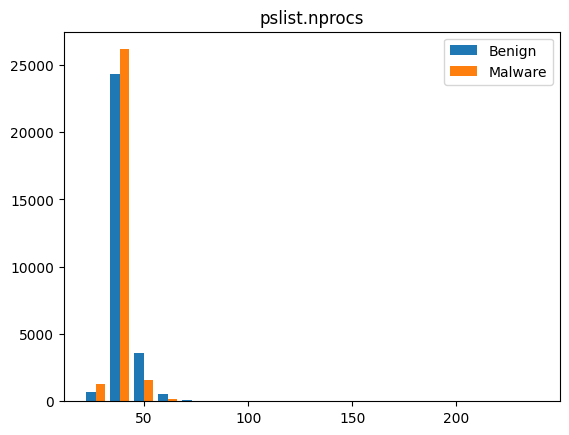

In [4]:
# Histogram penyebaran data benign dan malware pada fitur pslist.nproc.
x = BenignData["pslist.nproc"]
y = MalwareData["pslist.nproc"]
bins = np.linspace(min(DM['pslist.nproc']), max(DM['pslist.nproc']), 20)

plt.title("pslist.nprocs")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

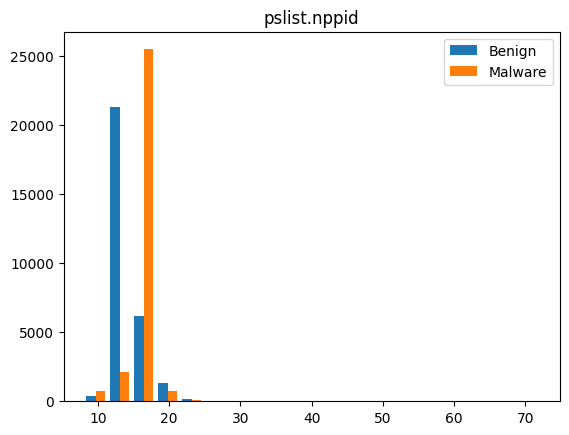

In [5]:
# Histogram penyebaran data benign dan malware pada fitur pslist.nppid.
x = BenignData["pslist.nppid"]
y = MalwareData["pslist.nppid"]
bins = np.linspace(min(DM['pslist.nppid']), max(DM['pslist.nppid']), 20)

plt.title("pslist.nppid")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

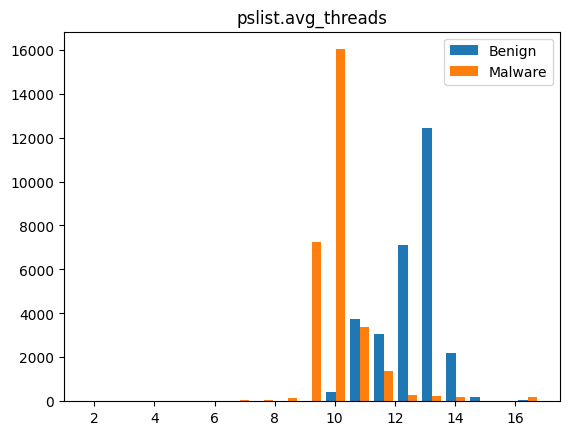

In [6]:
# Histogram penyebaran data benign dan malware pada fitur pslist.avg_threads.
x = BenignData["pslist.avg_threads"]
y = MalwareData["pslist.avg_threads"]
bins = np.linspace(min(DM['pslist.avg_threads']), max(DM['pslist.avg_threads']), 20)

plt.title("pslist.avg_threads")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

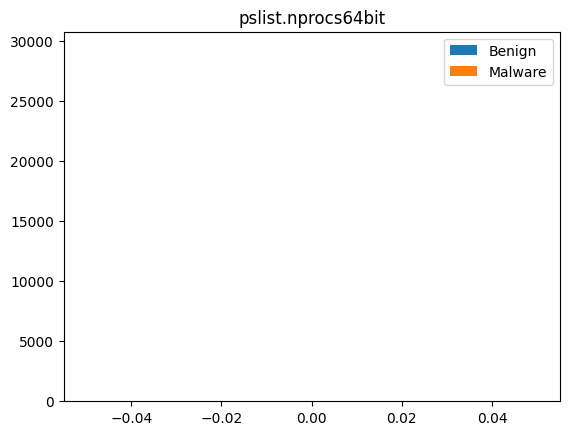

In [7]:
# Histogram penyebaran data benign dan malware pada fitur pslist.nprocs64bit.
x = BenignData["pslist.nprocs64bit"]
y = MalwareData["pslist.nprocs64bit"]
bins = np.linspace(min(DM['pslist.nprocs64bit']), max(DM['pslist.nprocs64bit']), 20)

plt.title("pslist.nprocs64bit")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

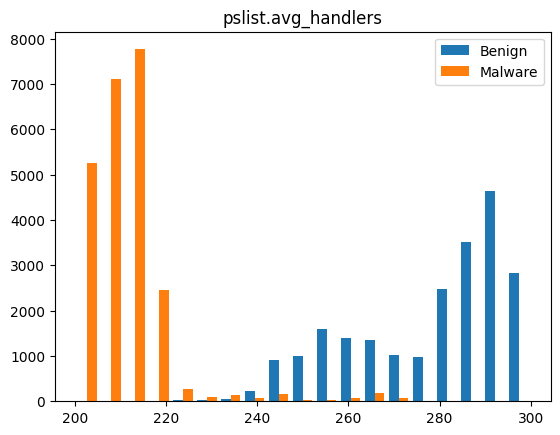

In [8]:
# Histogram penyebaran data benign dan malware pada fitur pslist.avg_handlers.
x = BenignData["pslist.avg_handlers"]
y = MalwareData["pslist.avg_handlers"]
bins = np.linspace(200, 300, 20) # Berbeda karena mayoritas data bernilai 200 sampai 300, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe

plt.title("pslist.avg_handlers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

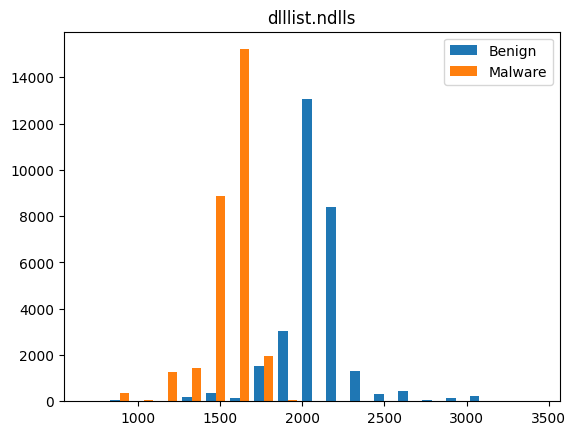

In [9]:
# Histogram penyebaran data benign dan malware pada fitur dlllist.ndll.
x = BenignData["dlllist.ndlls"]
y = MalwareData["dlllist.ndlls"]
bins = np.linspace(min(DM['dlllist.ndlls']), max(DM['dlllist.ndlls']), 20)

plt.title("dlllist.ndlls")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

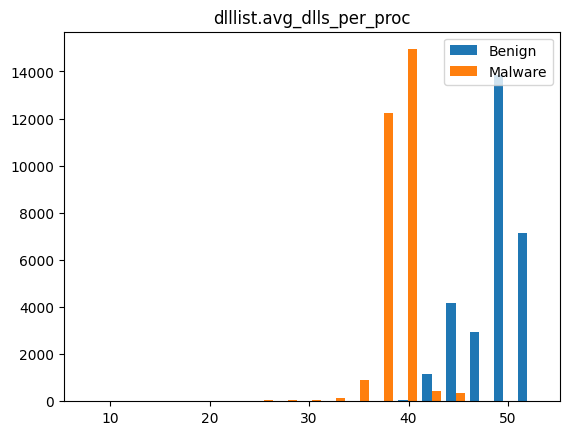

In [10]:
# Histogram penyebaran data benign dan malware pada fitur dlllist.avg_dlls_per_proc.
x = BenignData["dlllist.avg_dlls_per_proc"]
y = MalwareData["dlllist.avg_dlls_per_proc"]
bins = np.linspace(min(DM['dlllist.avg_dlls_per_proc']), max(DM['dlllist.avg_dlls_per_proc']), 20)

plt.title("dlllist.avg_dlls_per_proc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

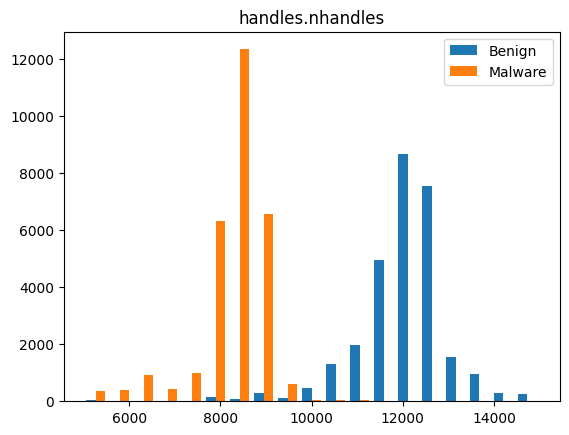

In [11]:
# Histogram penyebaran data benign dan malware pada fitur handles.nhandles.
x = BenignData["handles.nhandles"]
y = MalwareData["handles.nhandles"]
bins = np.linspace(5000, 15000, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nhandles")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

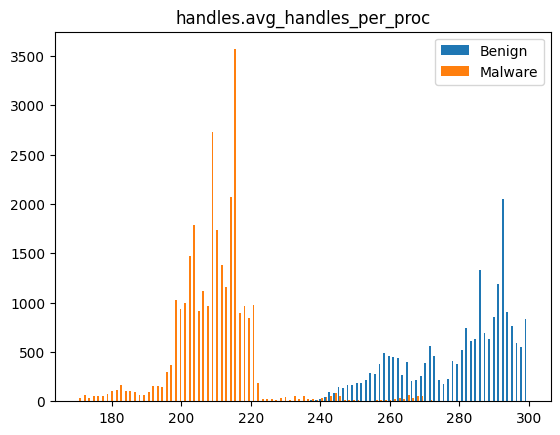

In [12]:
# Histogram penyebaran data benign dan malware pada fitur handles.avg_handles_per_proc.
x = BenignData["handles.avg_handles_per_proc"]
y = MalwareData["handles.avg_handles_per_proc"]
bins = np.linspace(170, 300, 100) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.avg_handles_per_proc")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

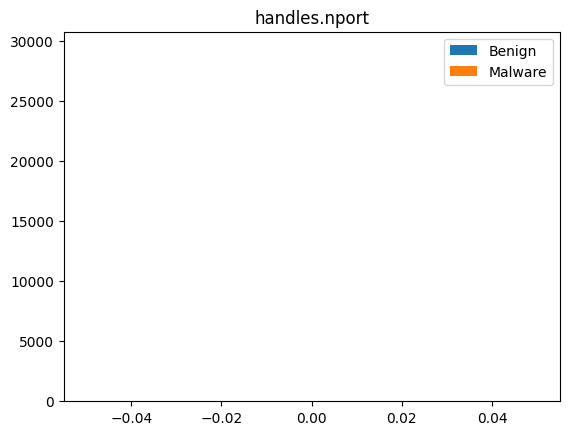

In [13]:
# Histogram penyebaran data benign dan malware pada fitur handles.nport.
x = BenignData["handles.nport"]
y = MalwareData["handles.nport"]
bins = np.linspace(min(DM['handles.nport']), max(DM['handles.nport']), 20)

plt.title("handles.nport")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

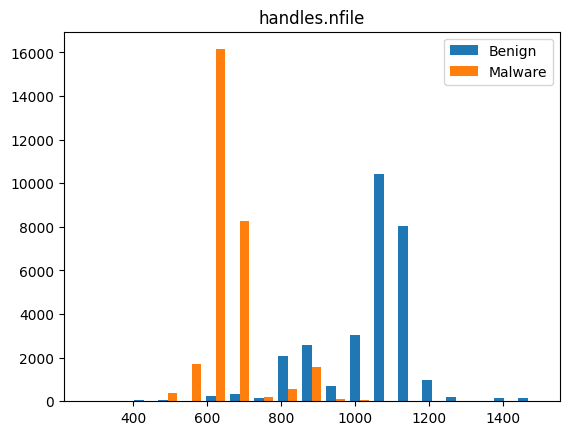

In [14]:
# Histogram penyebaran data benign dan malware pada fitur handles.nfile.
x = BenignData["handles.nfile"]
y = MalwareData["handles.nfile"]
bins = np.linspace(min(DM['handles.nfile']), 1500, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nfile")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

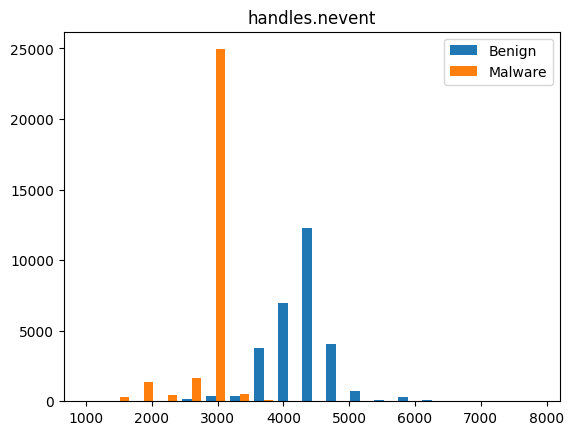

In [15]:
# Histogram penyebaran data benign dan malware pada fitur handles.nevent.
x = BenignData["handles.nevent"]
y = MalwareData["handles.nevent"]
bins = np.linspace(min(DM['handles.nevent']), max(DM['handles.nevent']), 20)

plt.title("handles.nevent")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

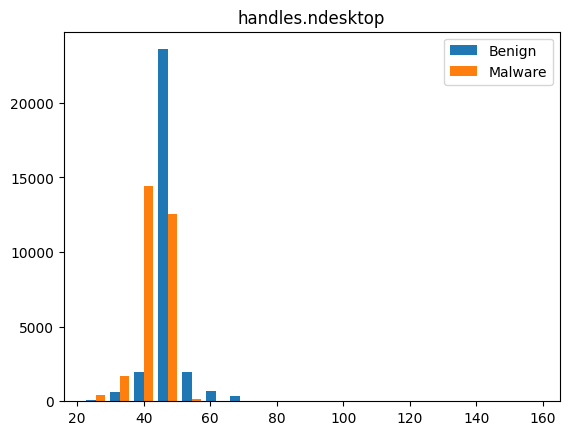

In [16]:
# Histogram penyebaran data benign dan malware pada fitur handles.ndesktop.
x = BenignData["handles.ndesktop"]
y = MalwareData["handles.ndesktop"]
bins = np.linspace(min(DM['handles.ndesktop']), max(DM['handles.ndesktop']), 20)

plt.title("handles.ndesktop")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

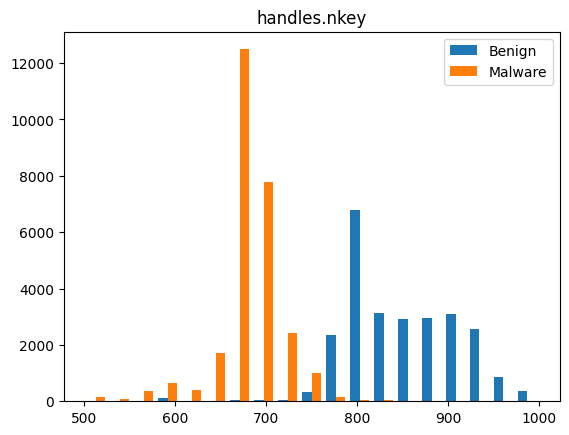

In [17]:
# Histogram penyebaran data benign dan malware pada fitur handles.nkey.
x = BenignData["handles.nkey"]
y = MalwareData["handles.nkey"]
bins = np.linspace(500, 1000, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nkey")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

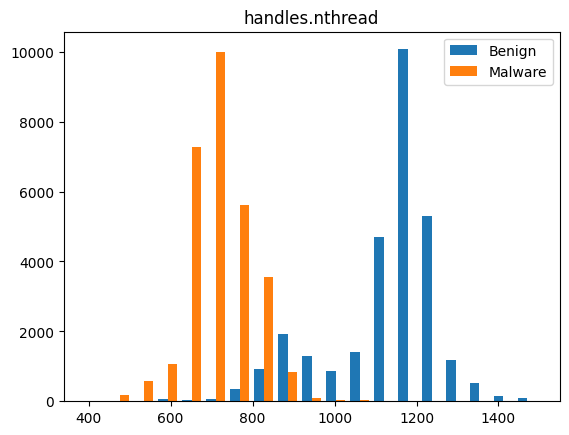

In [18]:
# Histogram penyebaran data benign dan malware pada fitur handles.nthread.
x = BenignData["handles.nthread"]
y = MalwareData["handles.nthread"]
bins = np.linspace(min(DM['handles.nthread']), 1500, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nthread")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

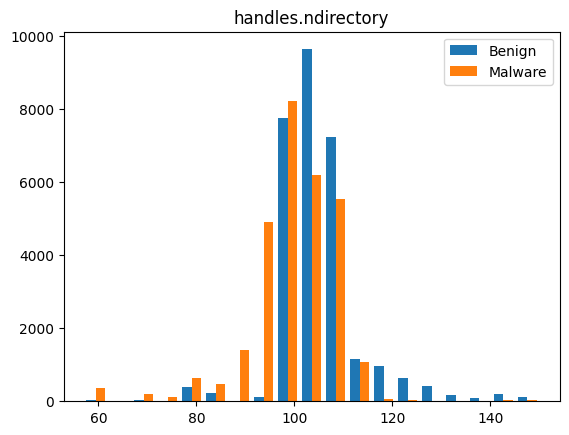

In [19]:
# Histogram penyebaran data benign dan malware pada fitur handles.ndirectory.
x = BenignData["handles.ndirectory"]
y = MalwareData["handles.ndirectory"]
bins = np.linspace(min(DM['handles.ndirectory']), 150, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.ndirectory")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

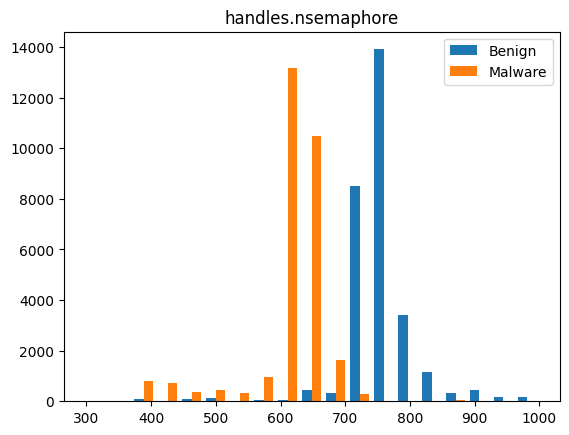

In [20]:
# Histogram penyebaran data benign dan malware pada fitur handles.nsemaphore.
x = BenignData["handles.nsemaphore"]
y = MalwareData["handles.nsemaphore"]
bins = np.linspace(min(DM['handles.nsemaphore']), 1000, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nsemaphore")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

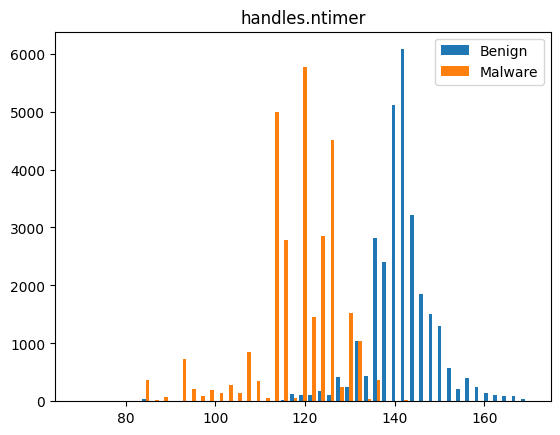

In [21]:
# Histogram penyebaran data benign dan malware pada fitur handles.ntimer.
x = BenignData["handles.ntimer"]
y = MalwareData["handles.ntimer"]
bins = np.linspace(min(DM['handles.ntimer']), 170, 50) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.ntimer")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

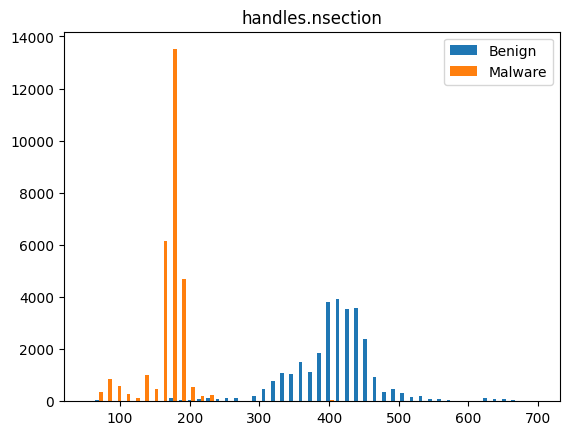

In [22]:
# Histogram penyebaran data benign dan malware pada fitur handles.nsection.
x = BenignData["handles.nsection"]
y = MalwareData["handles.nsection"]
bins = np.linspace(min(DM['handles.nsection']), 700, 50) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("handles.nsection")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

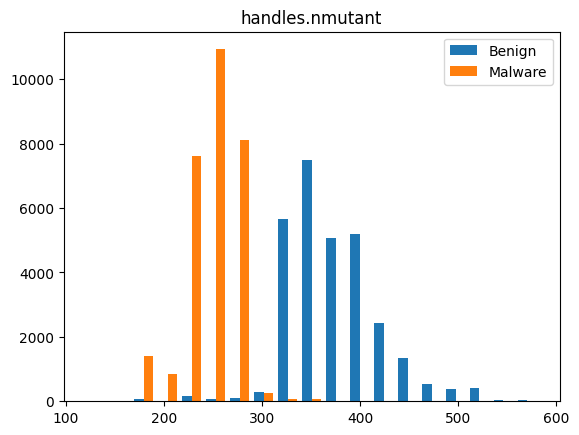

In [23]:
# Histogram penyebaran data benign dan malware pada fitur handles.nmutant.
x = BenignData["handles.nmutant"]
y = MalwareData["handles.nmutant"]
bins = np.linspace(min(DM['handles.nmutant']), max(DM['handles.nmutant']), 20)

plt.title("handles.nmutant")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

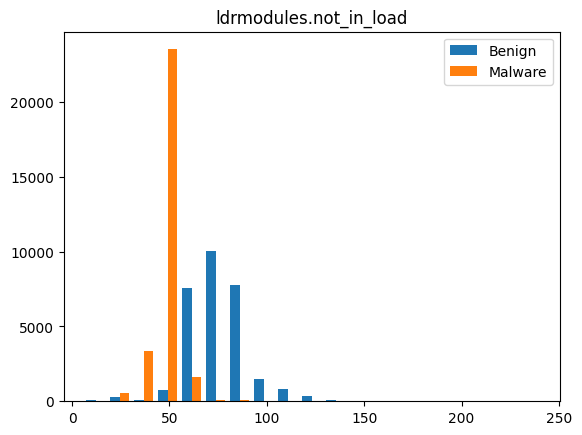

In [24]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_load.
x = BenignData["ldrmodules.not_in_load"]
y = MalwareData["ldrmodules.not_in_load"]
bins = np.linspace(min(DM['ldrmodules.not_in_load']), max(DM['ldrmodules.not_in_load']), 20)

plt.title("ldrmodules.not_in_load")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

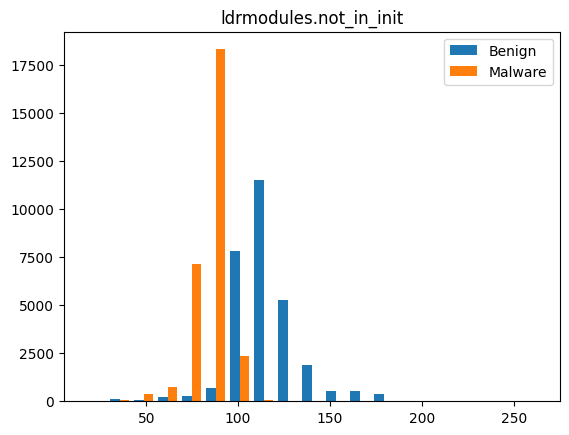

In [25]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_init.
x = BenignData["ldrmodules.not_in_init"]
y = MalwareData["ldrmodules.not_in_init"]
bins = np.linspace(min(DM['ldrmodules.not_in_init']), max(DM['ldrmodules.not_in_init']), 20)

plt.title("ldrmodules.not_in_init")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

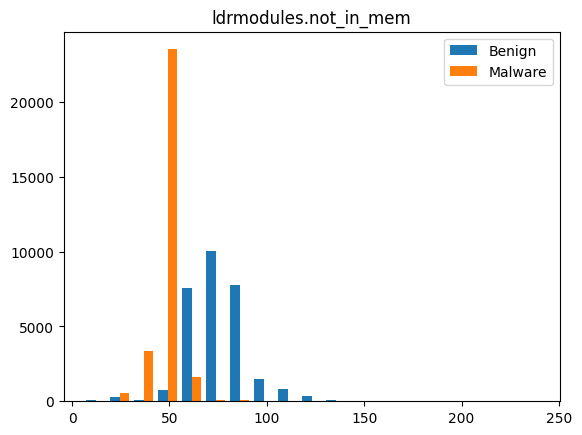

In [26]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_mem.
x = BenignData["ldrmodules.not_in_mem"]
y = MalwareData["ldrmodules.not_in_mem"]
bins = np.linspace(min(DM['ldrmodules.not_in_mem']), max(DM['ldrmodules.not_in_mem']), 20)

plt.title("ldrmodules.not_in_mem")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

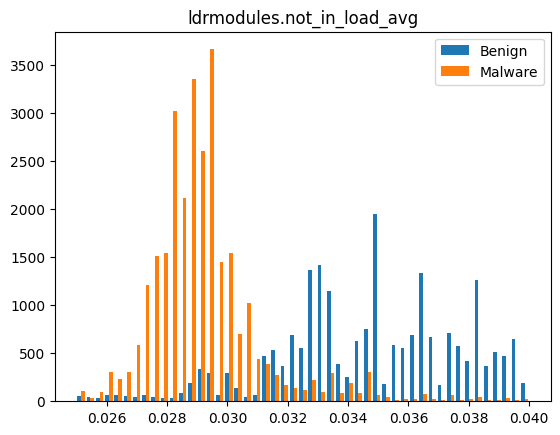

In [27]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_load_avg.
x = BenignData["ldrmodules.not_in_load_avg"]
y = MalwareData["ldrmodules.not_in_load_avg"]
bins = np.linspace(0.025, 0.04, 50) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("ldrmodules.not_in_load_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

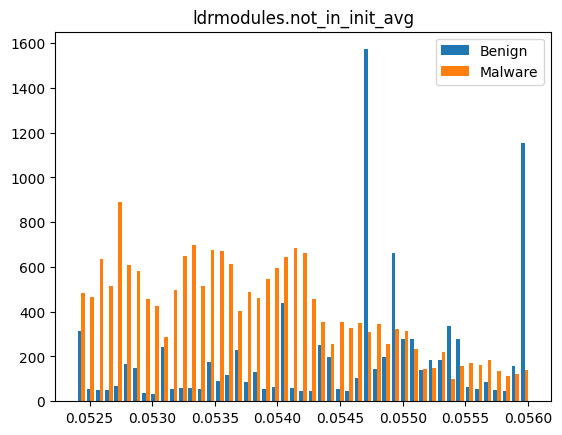

In [28]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_init_avg.
x = BenignData["ldrmodules.not_in_init_avg"]
y = MalwareData["ldrmodules.not_in_init_avg"]
bins = np.linspace(0.052397, 0.056010, 50) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("ldrmodules.not_in_init_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

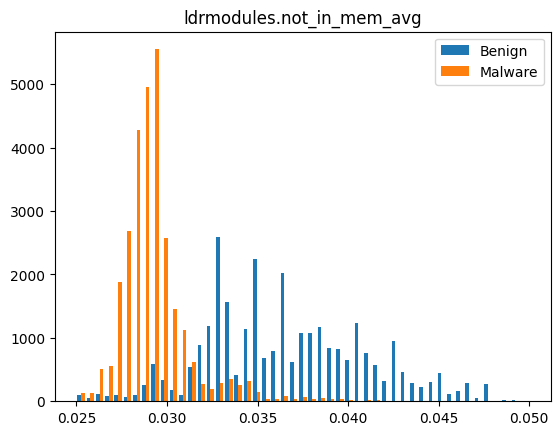

In [29]:
# Histogram penyebaran data benign dan malware pada fitur ldrmodules.not_in_mem_avg.
x = BenignData["ldrmodules.not_in_mem_avg"]
y = MalwareData["ldrmodules.not_in_mem_avg"]
bins = np.linspace(0.025, 0.05, 50) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("ldrmodules.not_in_mem_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

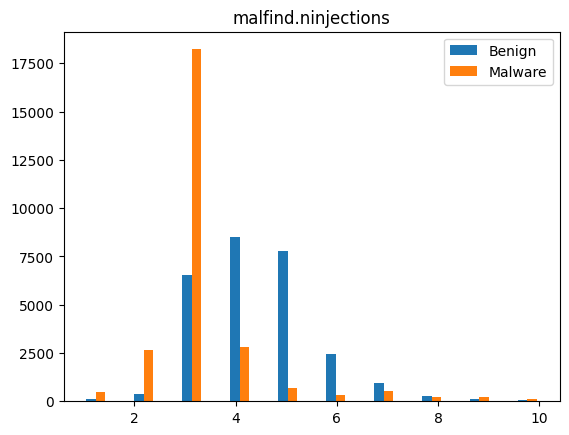

In [30]:
# Histogram penyebaran data benign dan malware pada fitur malfind.ninjections.
x = BenignData["malfind.ninjections"]
y = MalwareData["malfind.ninjections"]
bins = np.linspace(min(DM['malfind.ninjections']), 10, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("malfind.ninjections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

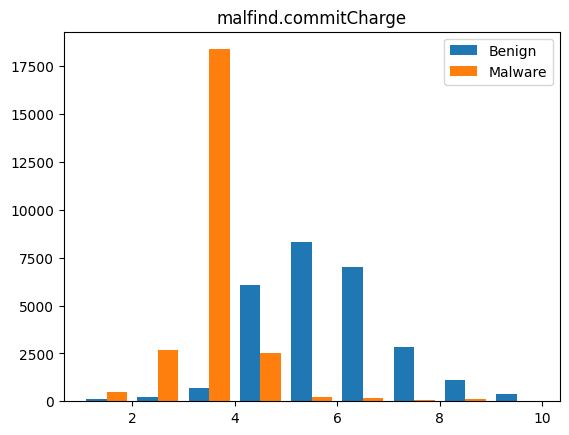

In [31]:
# Histogram penyebaran data benign dan malware pada fitur malfind.commitCharge.
x = BenignData["malfind.commitCharge"]
y = MalwareData["malfind.commitCharge"]
bins = np.linspace(min(DM['malfind.commitCharge']), 10, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("malfind.commitCharge")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

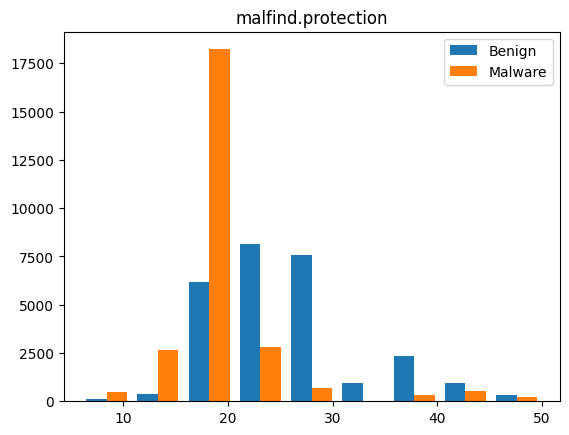

In [32]:
# Histogram penyebaran data benign dan malware pada fitur malfind.protection.
x = BenignData["malfind.protection"]
y = MalwareData["malfind.protection"]
bins = np.linspace(min(DM['malfind.protection']), 50, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("malfind.protection")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

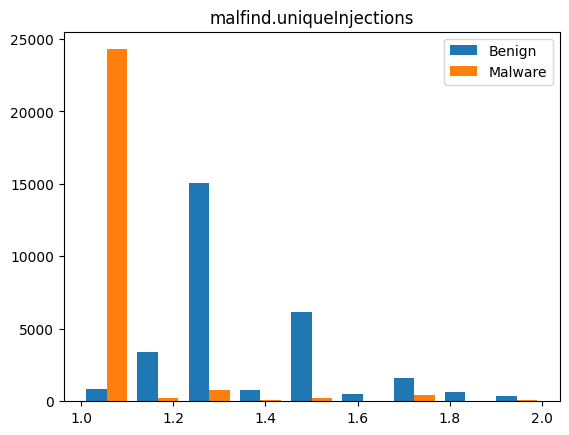

In [33]:
# Histogram penyebaran data benign dan malware pada fitur malfind.uniqueInjections.
x = BenignData["malfind.uniqueInjections"]
y = MalwareData["malfind.uniqueInjections"]
bins = np.linspace(min(DM['malfind.uniqueInjections']), 2, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("malfind.uniqueInjections")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

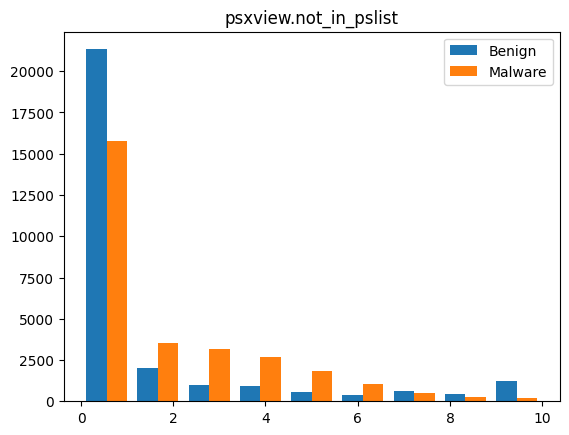

In [34]:
# Histogram penyebaran data benign dan malware pada fitur sxview.not_in_pslist.
x = BenignData["psxview.not_in_pslist"]
y = MalwareData["psxview.not_in_pslist"]
bins = np.linspace(min(DM['psxview.not_in_pslist']), 10, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_pslist")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

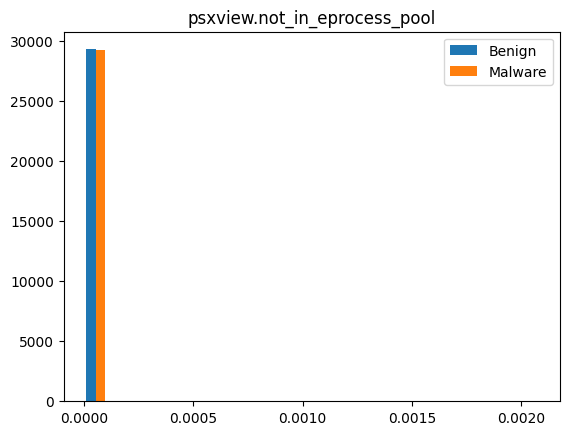

In [35]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_eprocess_pool.
x = BenignData["psxview.not_in_eprocess_pool"]
y = MalwareData["psxview.not_in_eprocess_pool"]
bins = np.linspace(min(DM['psxview.not_in_eprocess_pool']), 0.002082053, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_eprocess_pool")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

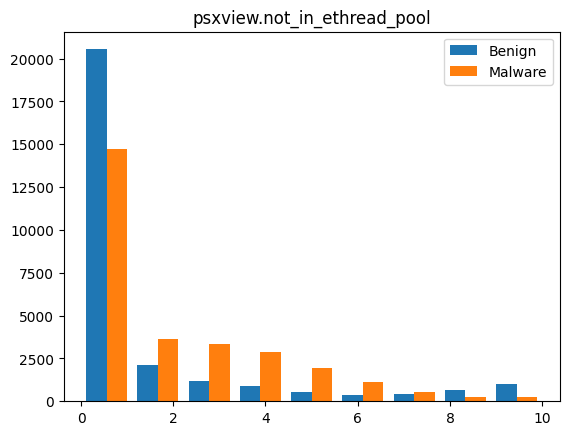

In [36]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_ethread_pool.
x = BenignData["psxview.not_in_ethread_pool"]
y = MalwareData["psxview.not_in_ethread_pool"]
bins = np.linspace(min(DM['psxview.not_in_ethread_pool']), 10, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_ethread_pool")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

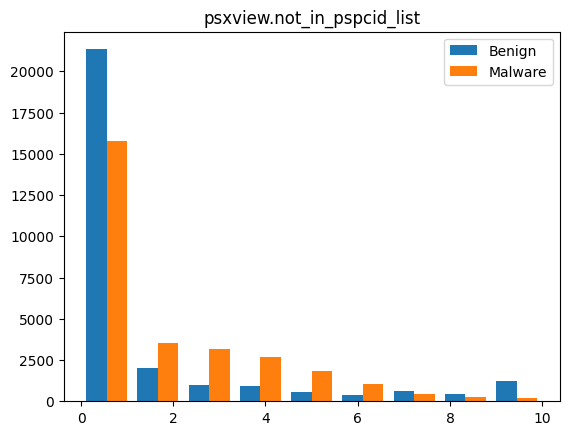

In [37]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_pspcid_list.
x = BenignData["psxview.not_in_pspcid_list"]
y = MalwareData["psxview.not_in_pspcid_list"]
bins = np.linspace(min(DM['psxview.not_in_pspcid_list']), 10, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_pspcid_list")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

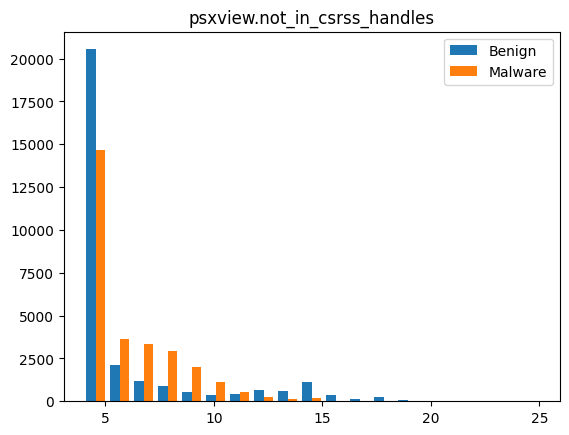

In [38]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_csrss_handles.
x = BenignData["psxview.not_in_csrss_handles"]
y = MalwareData["psxview.not_in_csrss_handles"]
bins = np.linspace(min(DM['psxview.not_in_csrss_handles']), 25, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_csrss_handles")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

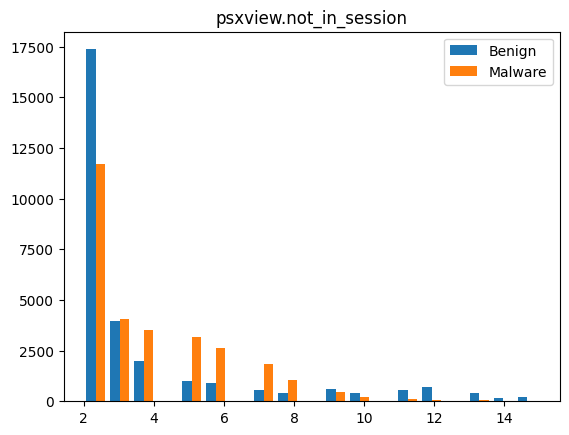

In [39]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_session.
x = BenignData["psxview.not_in_session"]
y = MalwareData["psxview.not_in_session"]
bins = np.linspace(min(DM['psxview.not_in_session']), 15, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_session")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

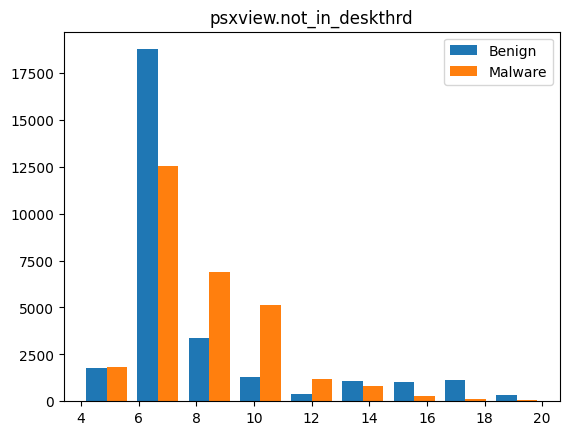

In [40]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_deskthrd.
x = BenignData["psxview.not_in_deskthrd"]
y = MalwareData["psxview.not_in_deskthrd"]
bins = np.linspace(min(DM['psxview.not_in_deskthrd']), 20, 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_deskthrd")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

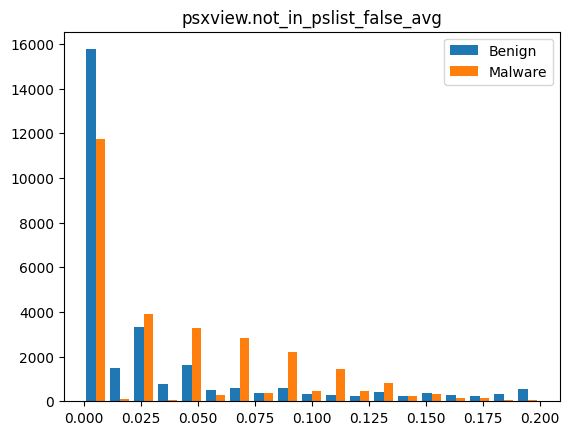

In [41]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_pslist_false_avg.
x = BenignData["psxview.not_in_pslist_false_avg"]
y = MalwareData["psxview.not_in_pslist_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_pslist_false_avg']), 0.2, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_pslist_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

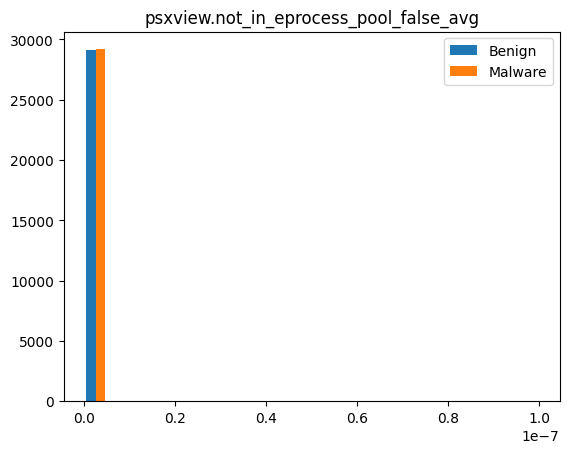

In [42]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_eprocess_pool_false_avg.
x = BenignData["psxview.not_in_eprocess_pool_false_avg"]
y = MalwareData["psxview.not_in_eprocess_pool_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_eprocess_pool_false_avg']), 0.0000001, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_eprocess_pool_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

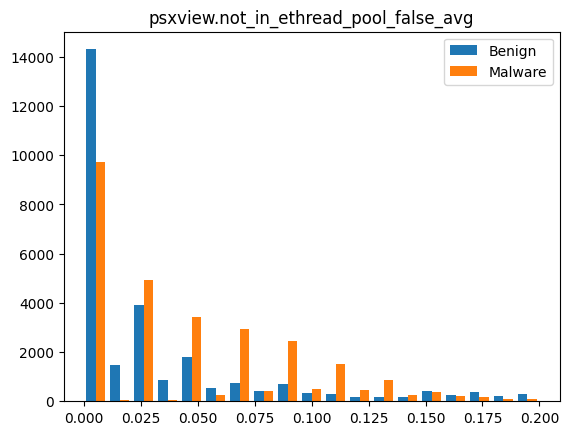

In [43]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_ethread_pool_false_avg.
x = BenignData["psxview.not_in_ethread_pool_false_avg"]
y = MalwareData["psxview.not_in_ethread_pool_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_ethread_pool_false_avg']), 0.2, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("psxview.not_in_ethread_pool_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

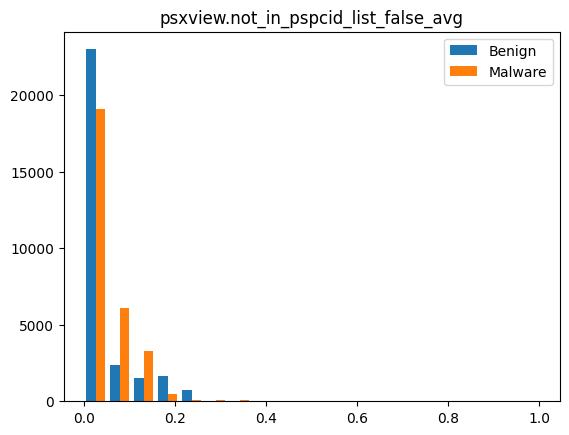

In [44]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_pspcid_list_false_avg.
x = BenignData["psxview.not_in_pspcid_list_false_avg"]
y = MalwareData["psxview.not_in_pspcid_list_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_pspcid_list_false_avg']), max(DM['psxview.not_in_pspcid_list_false_avg']), 20)

plt.title("psxview.not_in_pspcid_list_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

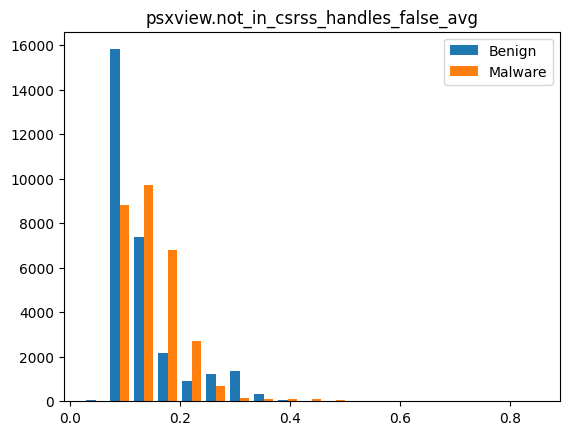

In [45]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_csrss_handles_false_avg.
x = BenignData["psxview.not_in_csrss_handles_false_avg"]
y = MalwareData["psxview.not_in_csrss_handles_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_csrss_handles_false_avg']), max(DM['psxview.not_in_csrss_handles_false_avg']), 20)

plt.title("psxview.not_in_csrss_handles_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

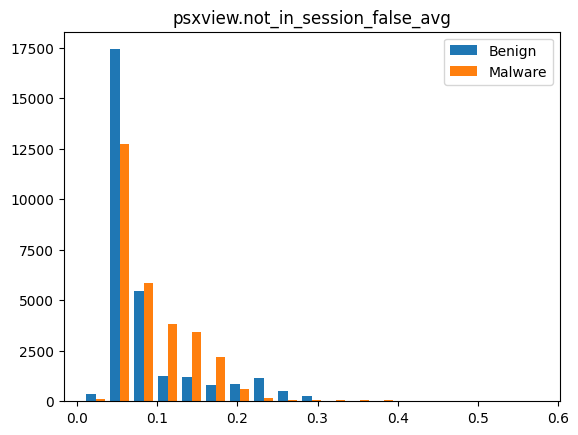

In [46]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_session_false_avg.
x = BenignData["psxview.not_in_session_false_avg"]
y = MalwareData["psxview.not_in_session_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_session_false_avg']), max(DM['psxview.not_in_session_false_avg']), 20)

plt.title("psxview.not_in_session_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

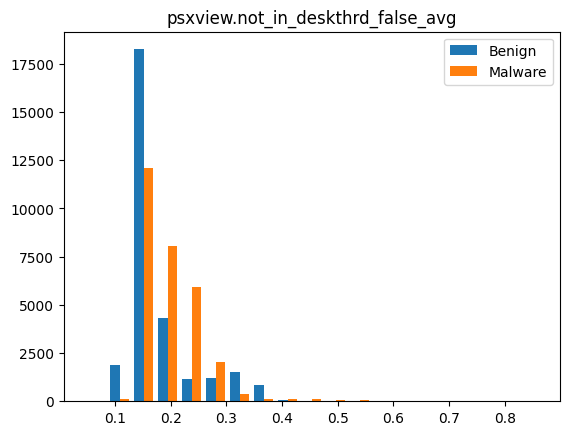

In [47]:
# Histogram penyebaran data benign dan malware pada fitur psxview.not_in_deskthrd_false_avg.
x = BenignData["psxview.not_in_deskthrd_false_avg"]
y = MalwareData["psxview.not_in_deskthrd_false_avg"]
bins = np.linspace(min(DM['psxview.not_in_deskthrd_false_avg']), max(DM['psxview.not_in_deskthrd_false_avg']), 20)

plt.title("psxview.not_in_deskthrd_false_avg")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

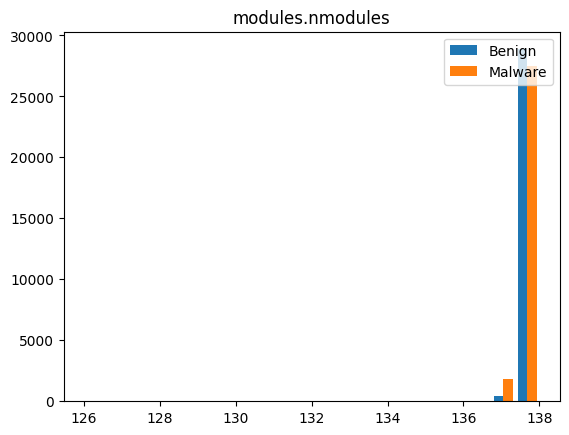

In [48]:
# Histogram penyebaran data benign dan malware pada fitur modules.nmodules.
x = BenignData["modules.nmodules"]
y = MalwareData["modules.nmodules"]
bins = np.linspace(min(DM['modules.nmodules']), max(DM['modules.nmodules']), 20)

plt.title("modules.nmodules")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

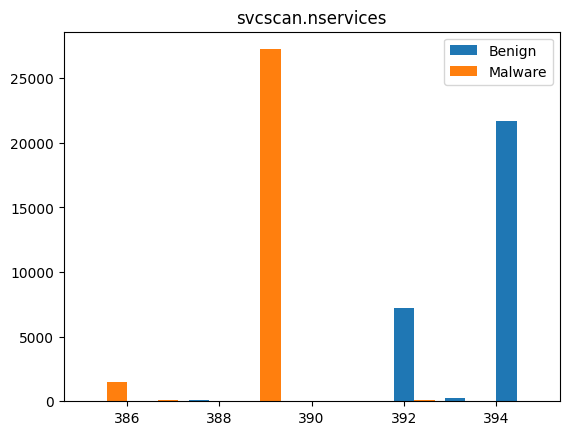

In [49]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.nservices.
x = BenignData["svcscan.nservices"]
y = MalwareData["svcscan.nservices"]
bins = np.linspace(385, max(DM['svcscan.nservices']), 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("svcscan.nservices")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

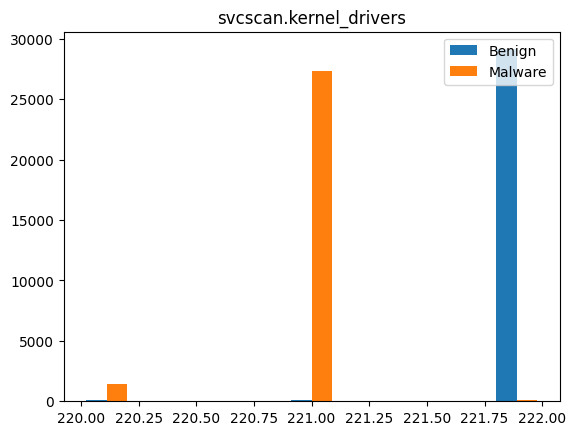

In [50]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.kernel_drivers.
x = BenignData["svcscan.kernel_drivers"]
y = MalwareData["svcscan.kernel_drivers"]
bins = np.linspace(220, max(DM['svcscan.kernel_drivers']), 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("svcscan.kernel_drivers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

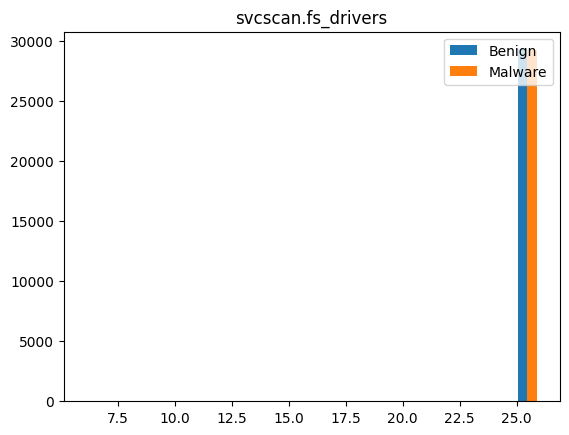

In [51]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.fs_drivers.
x = BenignData["svcscan.fs_drivers"]
y = MalwareData["svcscan.fs_drivers"]
bins = np.linspace(min(DM['svcscan.fs_drivers']), max(DM['svcscan.fs_drivers']), 20)

plt.title("svcscan.fs_drivers")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

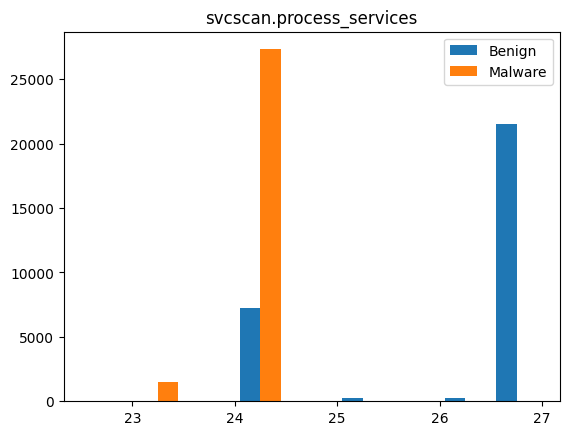

In [52]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.process_services.
x = BenignData["svcscan.process_services"]
y = MalwareData["svcscan.process_services"]
bins = np.linspace(22.5, max(DM['svcscan.process_services']), 10) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("svcscan.process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

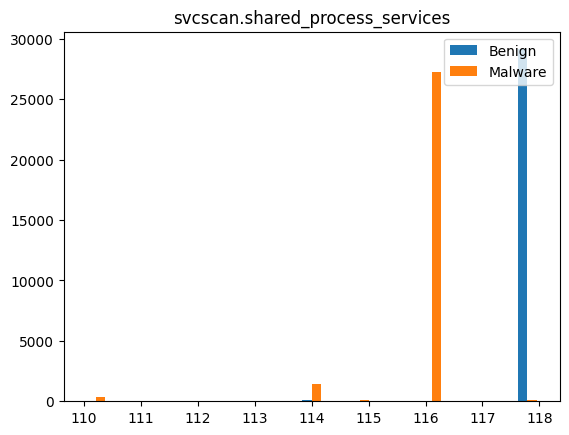

In [53]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.shared_process_services.
x = BenignData["svcscan.shared_process_services"]
y = MalwareData["svcscan.shared_process_services"]
bins = np.linspace(110, max(DM['svcscan.shared_process_services']), 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("svcscan.shared_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

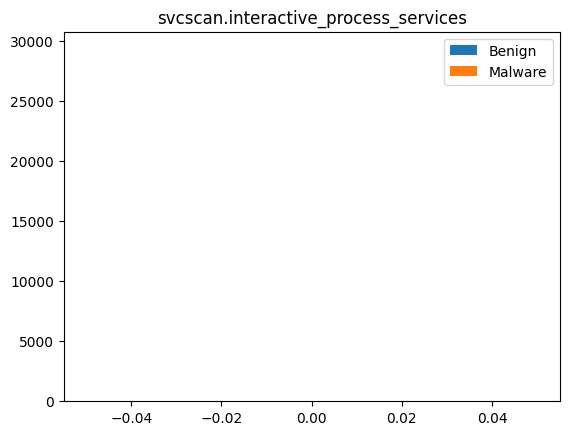

In [54]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.interactive_process_services.
x = BenignData["svcscan.interactive_process_services"]
y = MalwareData["svcscan.interactive_process_services"]
bins = np.linspace(min(DM['svcscan.interactive_process_services']), max(DM['svcscan.interactive_process_services']), 20)

plt.title("svcscan.interactive_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

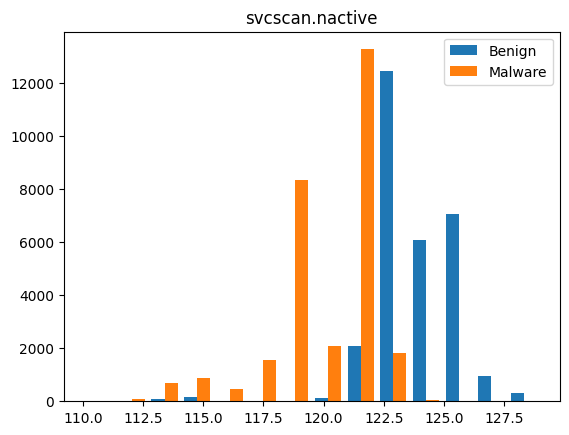

In [55]:
# Histogram penyebaran data benign dan malware pada fitur svcscan.nactive.
x = BenignData["svcscan.nactive"]
y = MalwareData["svcscan.nactive"]
bins = np.linspace(110, max(DM['svcscan.nactive']), 15) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("svcscan.nactive")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

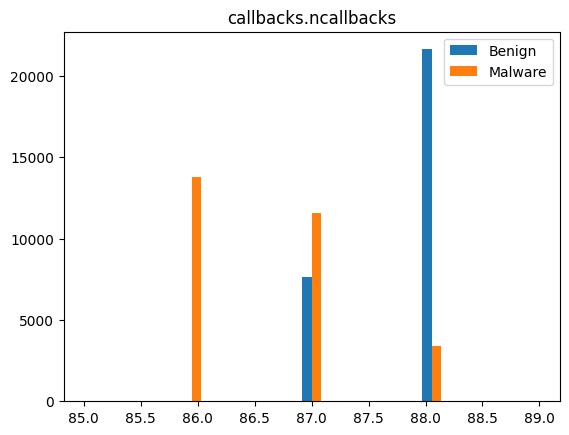

In [56]:
# Histogram penyebaran data benign dan malware pada fitur callbacks.ncallback.
x = BenignData["callbacks.ncallbacks"]
y = MalwareData["callbacks.ncallbacks"]
bins = np.linspace(85, max(DM['callbacks.ncallbacks']), 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("callbacks.ncallbacks")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

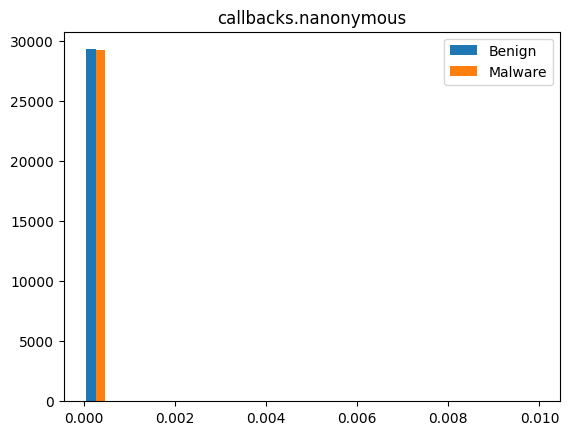

In [57]:
# Histogram penyebaran data benign dan malware pada fitur callbacks.nanonymous.
x = BenignData["callbacks.nanonymous"]
y = MalwareData["callbacks.nanonymous"]
bins = np.linspace(min(DM['callbacks.nanonymous']), 0.01, 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("callbacks.nanonymous")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

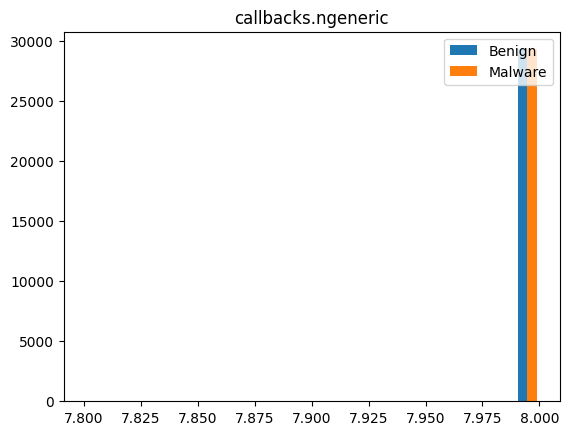

In [58]:
# Histogram penyebaran data benign dan malware pada fitur callbacks.ngeneric.
x = BenignData["callbacks.ngeneric"]
y = MalwareData["callbacks.ngeneric"]
bins = np.linspace(7.8, max(DM['callbacks.ngeneric']), 20) # Berbeda dari yang lain karena perlu disesuaikan agar dapat melihat penyebarannya, saya coba satu per satu yang dapat memvisualisasikan penyebaran paling baik/terlihat.

plt.title("callbacks.ngeneric")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [59]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['Category','Class', 'pslist.nproc', 'pslist.nppid', 'pslist.nprocs64bit', 'handles.nport', 'handles.ndesktop', 'handles.ndirectory',  'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.protection', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg', 'modules.nmodules', 'svcscan.fs_drivers', 'svcscan.interactive_process_services', 'callbacks.nanonymous', 'callbacks.ngeneric', ],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['Class'].values # CLass karena merepresentasikan binary class

In [60]:
# Memilih 10% data secara acak dari setiap fitur/column
sampled_data = DM.groupby('Class').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)

In [61]:
# Menampilkan list feature yang digunakan
Features = sampled_data.drop(['Category','Class', 'pslist.nproc', 'pslist.nppid', 'pslist.nprocs64bit', 'handles.nport', 'handles.ndesktop', 'handles.ndirectory',  'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.protection', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg', 'modules.nmodules', 'svcscan.fs_drivers', 'svcscan.interactive_process_services', 'callbacks.nanonymous', 'callbacks.ngeneric', ],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")
for i, column_name in enumerate(Features):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 pslist.avg_threads                       5860            float64
  2 pslist.avg_handlers                      5860            float64
  3 dlllist.ndlls                            5860            int64
  4 dlllist.avg_dlls_per_proc                5860            float64
  5 handles.nhandles                         5860            int64
  6 handles.avg_handles_per_proc             5860            float64
  7 handles.nfile                            5860            int64
  8 handles.nevent                           5860            int64
  9 handles.nkey                             5860            int64
 10 handles.nthread                          5860            int64
 11 handles.nsemaphore                       5

In [62]:
# Mencoba mencari threshold terbaik pada fitur yang dipilih
hasil_threshold = []

def Thresholding(threshold, feature):
    # Melakukan thresholding
    BenignDataThreshold = sampled_data[sampled_data[feature] > int(threshold)]
    MalwareDataThreshold = sampled_data[sampled_data[feature] <= int(threshold)]

    # menentukan TP, TN, FP, FN
    from sklearn.metrics import confusion_matrix

    # Untuk BenignDataThreshold
    y_true_benign = ["Benign"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold["Class"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["Malware"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold["Class"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung Precision, Recall, F1-score, dan Accuracy
    PrecisionThreshold = tp/(tp+fp) if (tp+fp) != 0 else 0
    RecallThreshold = tp/(tp+fn) if (tp+fn) != 0 else 0
    F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold)) if (PrecisionThreshold+RecallThreshold) != 0 else 0
    AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn) if (tp+fp+tn+fn) != 0 else 0

    matrix = [[feature, threshold], [PrecisionThreshold], [RecallThreshold], [F1ScoreThreshold], [AccuracyThreshold]]
    hasil_threshold.append(matrix)

for feature in tqdm(Features, desc='Progress'):
    Max = sampled_data[feature].max()
    Min = sampled_data[feature].min()

    for x in range(int(Min), int(Max + 1)):
        Thresholding(x, feature)

print(hasil_threshold)


Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [1:26:04<00:00, 206.57s/it]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=2000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [63]:
winner = [['', 0], [0], [0], [0], [0]]  # Format: [[feature, threshold], [precision], [recall], [f1-score], [accuracy]]

for result in hasil_threshold:
    if result[1][0] > winner[4][0]:
        winner = result

print(f"Dengan fitur {winner[0][0]} dan threshold {winner[0][1]}, menghasilkan akurasi {winner[4][0]} yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.")

Dengan fitur callbacks.ncallbacks dan threshold 89, menghasilkan akurasi 0.5 yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.


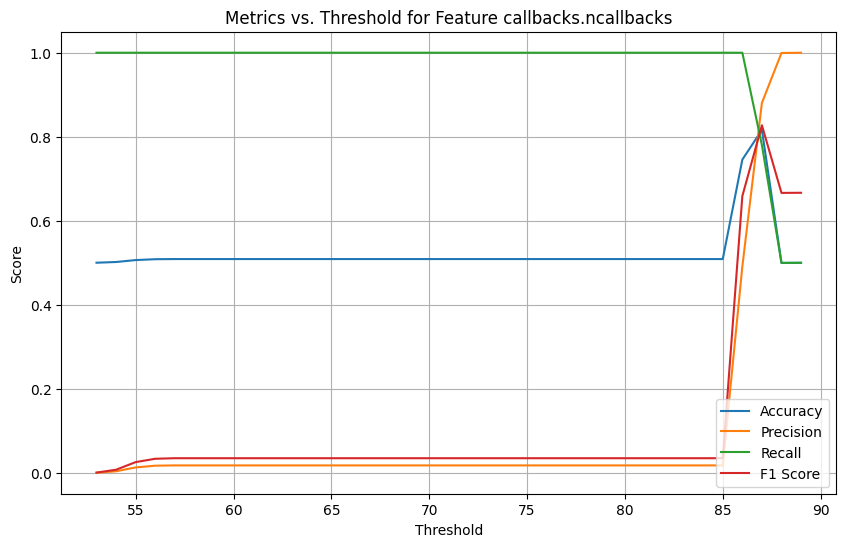

In [64]:
# Mendapatkan fitur pemenang dan thresholdnya
winner_feature, winner_threshold = winner[0]

# Memfilter hasil threshold untuk fitur pemenang
winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

# Pisahkan hasil menjadi list berdasarkan feature dan kolom
thresholds, precision, recall, f1_score, accuracy = [], [], [], [], []
for result in winner_results:
    thresholds.append(result[0][1])
    precision.append(result[1][0])
    recall.append(result[2][0])
    f1_score.append(result[3][0])
    accuracy.append(result[4][0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_score, label='F1 Score')

plt.title(f'Metrics vs. Threshold for Feature {winner_feature}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()